In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score # imports all the functions reqd for cross validation
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

**Importing the dataset**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# **Data cleaning**

**Encoding**

In [ ]:
df['Gender'] = df.Gender.map({'Male':1,'Female':0})

In [ ]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0


In [ ]:
df.isnull().sum() # No null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum() # No duplictes

0

In [ ]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
del df['User ID']

In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


No skew in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'OUTLIERS')

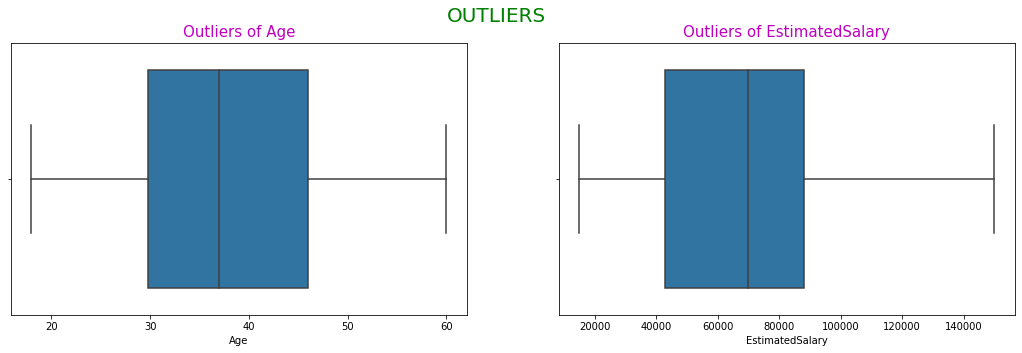

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot('Age',data=df)
plt.title("Outliers of Age",color='m',size=15)
plt.subplot(1,2,2)
sns.boxplot('EstimatedSalary',data=df)
plt.title("Outliers of EstimatedSalary",color='m',size=15)
plt.suptitle("OUTLIERS",color='g',size=20)

No outliers in the given data.

# **Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Gender','Age','EstimatedSalary']].values 
y = df['Purchased'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

# **Feature Scaling**

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# **Fitting K-NN to the Training set**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  1.0  score :  0.8499999999999999
K value  :  2  train score :  0.9178571428571428  score :  0.8392857142857142
K value  :  3  train score :  0.9142857142857143  score :  0.8821428571428571
K value  :  4  train score :  0.8964285714285715  score :  0.8785714285714287
K value  :  5  train score :  0.9178571428571428  score :  0.9
K value  :  6  train score :  0.9142857142857143  score :  0.8892857142857142
K value  :  7  train score :  0.9178571428571428  score :  0.9
K value  :  8  train score :  0.9071428571428571  score :  0.8892857142857142
K value  :  9  train score :  0.9142857142857143  score :  0.8964285714285716
K value  :  10  train score :  0.9071428571428571  score :  0.8892857142857142
K value  :  20  train score :  0.8928571428571429  score :  0.85
K value  :  50  train score :  0.7785714285714286  score :  0.75


In [ ]:
knn = KNeighborsClassifier(5) # at k=5 we got best cross val score(Average of evaluation metric)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

# **Predicting the Test set results**

In [ ]:
y_pred=knn.predict(X_test_scaled)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 1]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
115,0,1
116,1,1
117,0,0
118,0,0
119,1,1


# **Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_test,y_pred)

array([[73,  6],
       [ 4, 37]])

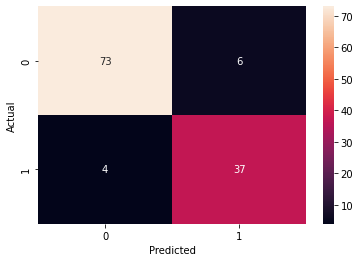

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


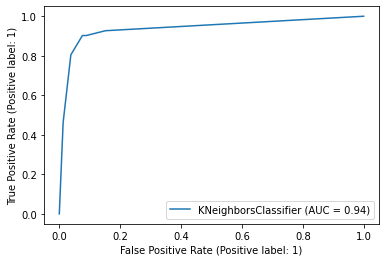

In [ ]:
plot_roc_curve(knn, X_test_scaled, y_test)

**We got auroc score of 0.94.It is very good model**